# Overlap between the established and proposed MPAs with the different zone categories

- established MPAs : South Orkney Island, Ross Sea MPA
- proposed MPAs : Weddell Sea MPA, D1 MPA, East Antractic MPA

In [4]:
# import libraries (ok sous base anaconda)
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray
import os


import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Cannot find header.dxf (GDAL_DATA is not defined)


In [5]:
import os
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration')
#os.chdir('./Key_Areas_krill_carbon_sequestration/outputs_formated_data/')

In [13]:
# load the zones file
zones_krill_carbon = rioxarray.open_rasterio('./output_results/zones_krill_carbon.nc')
zones_krill_carbon.rio.write_crs('epsg:4326', inplace=True)
zones_krill_carbon

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
[2700 values with dtype=float64]
Coordinates:
  * variable     (variable) <U9 'Zone_type'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  Zone_type
    _FillValue:                  nan
    scale_factor:                1.0
    add_offset:                  0.0

# Established MPAs
- The Ross Sea MPA (Conservation measure 91-05) which is devided in several zones with differnt objectives and limitations. We consider only the parts that are closed to krill fishing.
- The South Orkney Island MPA (conservation mesure 91-03)

In [10]:
# Open shape file with MPA polygon
MPAs = gpd.read_file('./data_envir/MPA/mpasPolygon.shp')
MPAs

,GAR_ID,GAR_Name,GAR_Short_,GAR_Long_L,GAR_Start_,GAR_End_Da,GAR_Descri,GAR_Refere,CreatedBy,CreatedOn,ModifiedBy,ModifiedOn,GAR_Size,geometry
0,92641,MPA RS-GPZi,GPZi,RS-GPZi,2016-12-01,None,The area bounded by a line starting where the ...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,1555850.51,"POLYGON ((180.00000 -73.50000, -180.00000 -76...."
1,92642,MPA RS-GPZii,GPZii,RS-GPZii,2016-12-01,None,The area bounded by a line starting at 62°30'S...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,74765.21,"POLYGON ((163.83333 -62.50000, 163.00000 -62.5..."
2,92643,MPA RS-GPZiii,GPZiii,RS-GPZiii,2016-12-01,None,The area bounded by a line starting at 69°S 17...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,21097.81,"POLYGON ((-179.00000 -69.00000, -179.00000 -66..."
3,92644,MPA RS-KRZ,KRZ,RS-KRZ,2016-12-01,None,The Krill Research Zone is bounded by a line s...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,328750.16,"POLYGON ((160.00000 -65.00000, 160.00000 -69.6..."
4,92645,MPA RS-SRZ,SRZ,RS-SRZ,2016-12-01,None,The Special Research Zone is bounded by a line...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,109563.21,"POLYGON ((-180.00000 -76.00000, -180.00000 -73..."
5,92652,MPA SO-SS,SOSS,SO-SS,2009-12-01,None,The South Orkney Islands southern shelf marine...,CCAMLR-XXVIII paragraphs 7.1; CM 91-03,Tim,2016-11-17,Tim,2016-11-17,93750.79,"POLYGON ((-41.00000 -61.50000, -41.00000 -64.0..."


In [12]:
Ross_area = MPAs.loc[[0, 1, 2, 4]]['GAR_Size'].sum()
SOrk_area = MPAs.loc[5]['GAR_Size']

print(Ross_area, SOrk_area)

1761276.74 93750.79


<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Extract the zones categories matching the MPA polygon

In [14]:
MPAs.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### South Orkney Island

In [15]:
# clip MPAs[5:] = the South Orkney MPA
SOrkney_krill_carbon = zones_krill_carbon.rio.clip(MPAs[5:].geometry.values, MPAs.crs, drop=False) # false so it keep the inital shape and fill with Na
SOrkney_krill_carbon

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * variable     (variable) <U9 'Zone_type'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  Zone_type
    scale_factor:                1.0
    add_offset:                  0.0
    _FillValue:                  nan

Text(0.5, 1.0, 'South Orkney Island MPA')

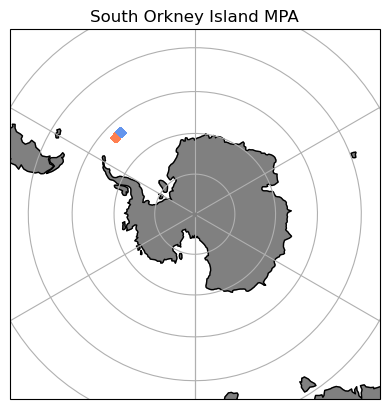

In [16]:
map_proj = ccrs.SouthPolarStereo()

p = SOrkney_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[1, 2, 3, 4], 
    colors = ['cornflowerblue','mediumaquamarine', 'coral']
)  
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'Zones', shrink = 0.8)
plt.title('South Orkney Island MPA')

#### Ross sea MPA

In [19]:
MPAs.loc[[0, 1, 2, 4]]

,GAR_ID,GAR_Name,GAR_Short_,GAR_Long_L,GAR_Start_,GAR_End_Da,GAR_Descri,GAR_Refere,CreatedBy,CreatedOn,ModifiedBy,ModifiedOn,GAR_Size,geometry
0,92641,MPA RS-GPZi,GPZi,RS-GPZi,2016-12-01,None,The area bounded by a line starting where the ...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,1555850.51,"POLYGON ((180.00000 -73.50000, -180.00000 -76...."
1,92642,MPA RS-GPZii,GPZii,RS-GPZii,2016-12-01,None,The area bounded by a line starting at 62°30'S...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,74765.21,"POLYGON ((163.83333 -62.50000, 163.00000 -62.5..."
2,92643,MPA RS-GPZiii,GPZiii,RS-GPZiii,2016-12-01,None,The area bounded by a line starting at 69°S 17...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,21097.81,"POLYGON ((-179.00000 -69.00000, -179.00000 -66..."
4,92645,MPA RS-SRZ,SRZ,RS-SRZ,2016-12-01,None,The Special Research Zone is bounded by a line...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,109563.21,"POLYGON ((-180.00000 -76.00000, -180.00000 -73..."


In [22]:
# Here put the GPZiii aside because it is straddling on the 180/-180 longitude line
Ross_krill_carbon = zones_krill_carbon.rio.clip(MPAs.loc[[0, 1, 4]].geometry.values, MPAs.crs, drop=False)
Ross_krill_carbon

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan]]])
Coordinates:
  * variable     (variable) <U9 'Zone_type'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  Zone_type
    scale_factor:                1.0
    add_offset:                  0.0
    _FillValue:                  nan

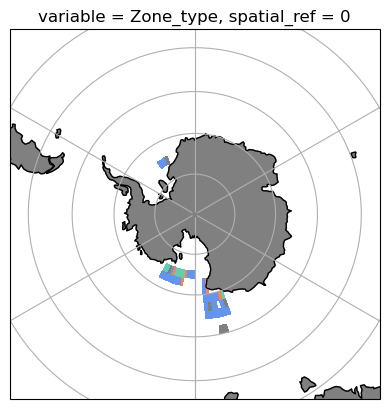

In [23]:
map_proj = ccrs.SouthPolarStereo()

p = Ross_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey', 'cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

### Solve the problem with the three cells 

In [43]:
# put in df to solve this
Ross_krill_carbon_df = Ross_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'Zone_type'})

# find the cells with anormal values (longitude not in the range of the MPA
Ross_krill_carbon_df_nona = Ross_krill_carbon_df.dropna()

# display(Ross_krill_carbon_df_nona) # pb cells = 2592, 2593, 2594, 2595, 2596

# change these cells to NaN in the Ross_krill_carbon_df
Ross_krill_carbon_df.at[2592, 'Zone_type'] = np.nan
Ross_krill_carbon_df.at[2593, 'Zone_type'] = np.nan
Ross_krill_carbon_df.at[2594, 'Zone_type'] = np.nan
Ross_krill_carbon_df.at[2595, 'Zone_type'] = np.nan
Ross_krill_carbon_df.at[2596, 'Zone_type'] = np.nan

Ross_krill_carbon_df.iloc[[2592, 2593, 2594, 2595, 2596]]

,y,x,Zone_type
2592,-75.0,-35.0,NaN
2593,-75.0,-33.0,NaN
2594,-75.0,-31.0,NaN
2595,-75.0,-29.0,NaN
2596,-75.0,-27.0,NaN


In [44]:
zones_krill_carbon.sel(y=-75, x=[169, 171, 173, 175, 177]).values

array([[2., 3., 3., 2., 3.]])

In [45]:
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -75) & (Ross_krill_carbon_df['x'].isin([169, 171, 173, 175, 177]))]

,y,x,Zone_type
2694,-75.0,169.0,NaN
2695,-75.0,171.0,NaN
2696,-75.0,173.0,NaN
2697,-75.0,175.0,NaN
2698,-75.0,177.0,NaN


In [47]:
#Add the cell missing at the -75 latitude
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -75) & (Ross_krill_carbon_df['x'].isin([169, 171, 173, 175, 177]))]

Ross_krill_carbon_df.at[2694, 'Zone_type'] = 2
Ross_krill_carbon_df.at[2695, 'Zone_type'] = 3
Ross_krill_carbon_df.at[2696, 'Zone_type'] = 3
Ross_krill_carbon_df.at[2697, 'Zone_type'] = 2
Ross_krill_carbon_df.at[2698, 'Zone_type'] = 3

Ross_krill_carbon_df.iloc[[2694, 2695, 2696, 2697, 2698]]

,y,x,Zone_type
2694,-75.0,169.0,2.0
2695,-75.0,171.0,3.0
2696,-75.0,173.0,3.0
2697,-75.0,175.0,2.0
2698,-75.0,177.0,3.0


### Add the GPZiii
Add the cells by hand of this zone (clip doenot work because it is straddling the long 0° line)

In [83]:
# transform in df to get the values by hand
zones_krill_carbon_df = zones_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'Zone_type'})

# find the rows that belong to the MAP RS-GPZiii
MPAs.loc[[2]].geometry.values

<GeometryArray>
[<POLYGON ((-179 -69, -179 -66.75, 179 -66.75, 179 -69, -179 -69))>]
Length: 1, dtype: geometry

In [84]:
RS_GPZiii = zones_krill_carbon_df.loc[(zones_krill_carbon_df['y'].isin([-69, -67])) & (zones_krill_carbon_df['x'].isin([-179, 179]))]
RS_GPZiii

,y,x,Zone_type
1800,-67.0,-179.0,1.0
1979,-67.0,179.0,1.0
1980,-69.0,-179.0,1.0
2159,-69.0,179.0,NaN


In [87]:
# change the value in the Ross_krill_carbon_df to add the cell
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -69) & (Ross_krill_carbon_df['x'] == -179)] # position = 1980
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -69) & (Ross_krill_carbon_df['x'] == 179)] # position = 2159
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -67) & (Ross_krill_carbon_df['x'] == -179)] # position = 1800
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -67) & (Ross_krill_carbon_df['x'] == 179)] # position = 1979
Ross_krill_carbon_df.at[1800, 'Zone_type'] = 1
Ross_krill_carbon_df.at[1979, 'Zone_type'] = 1
Ross_krill_carbon_df.at[1980, 'Zone_type'] = 1
# Ross_krill_carbon_df.at[2159, 'Zone_type'] = 0

#### Plot final version Ross Sea MPA

In [93]:
Ross_krill_carbon = xr.Dataset.from_dataframe(Ross_krill_carbon_df.set_index(['y', 'x'])) # convert into xarrayDataset
Ross_krill_carbon = xr.Dataset.to_array(Ross_krill_carbon)
Ross_krill_carbon

<xarray.DataArray (variable: 1, y: 15, x: 180)>
array([[[ 1.,  1.,  1., ...,  2.,  3., nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * y         (y) float64 -75.0 -73.0 -71.0 -69.0 ... -53.0 -51.0 -49.0 -47.0
  * x         (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * variable  (variable) object 'Zone_type'

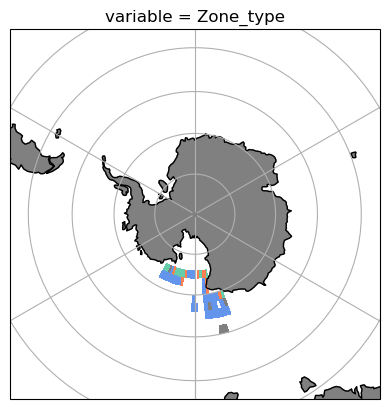

In [134]:
map_proj = ccrs.SouthPolarStereo()

p = Ross_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey', 'cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

### Save the extract of established MPAs

In [97]:
# arrays of the MPA separatly 
Ross_krill_carbon.to_netcdf('./output_results/Ross_mpa.nc')
SOrkney_krill_carbon.to_netcdf('./output_results/SOrkney_mpa.nc')

# Proposed MPAs

- Weddell Sea MPA
- D1 MPA
- East Antarctic MPA

## Weddell Sea

In [100]:
MPA_weddell = gpd.read_file('./data_envir/MPA/Weddell_sea_MPA.shp')
MPA_weddell.drop(index=[1], inplace = True) # take only the general protection zone

# check crs
print(MPA_weddell.crs) # epsg:4326
MPA_weddell.geometry.values

epsg:4326


<GeometryArray>
[<POLYGON ((0 -69, -2 -69, -2 -69.75, -4.75 -69.75, -4.75 -69, -6.25 -69, -6....>]
Length: 1, dtype: geometry

In [102]:
# clip MPAs 
Weddell_krill_carbon = zones_krill_carbon.rio.clip(MPA_weddell.geometry.values, MPA_weddell.crs, drop=False) # false so it keep the inital shape and fill with Na

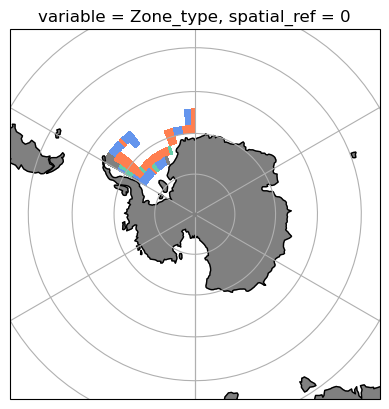

In [103]:
map_proj = ccrs.SouthPolarStereo()

p = Weddell_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey','cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

## D1 MPA

In [128]:
D1_MPA = gpd.read_file('./data_envir/MPA/D1_MPA.shp')
D1_MPA# all rows are general protection zone polygons, closed to krill fihsing all year round

,row_id,Name,geometry
0,0,D1MPA_GPZ-EI,"POLYGON ((-53.44000 -60.97000, -53.44000 -61.7..."
1,1,D1MPA_GPZ-JOIN,"POLYGON ((-56.08000 -63.00000, -53.44000 -63.0..."
2,2,D1MPA_GPZ-LIC,"POLYGON ((-60.25000 -62.00000, -62.77000 -62.5..."
3,3,D1MPA_GPZ-GSW,"POLYGON ((-63.70000 -64.00000, -62.20000 -64.9..."
4,4,D1MPA_GPZ-GC,"POLYGON ((-65.20000 -64.89000, -63.63000 -65.6..."
5,5,D1MPA_GPZ-MB,"POLYGON ((-68.05000 -66.29000, -65.84000 -66.9..."
6,6,D1MPA_GPZ-SWAP_coast,"POLYGON ((-70.00000 -67.00000, -70.00000 -74.2..."
7,7,D1MPA_GPZ-SWAP_shelf,"POLYGON ((-70.00000 -66.00000, -70.00000 -67.0..."
8,8,D1MPA_GPZ-SOI,"POLYGON ((-43.50000 -60.25000, -43.50000 -61.5..."


In [129]:
# clip MPAs 
D1_krill_carbon = zones_krill_carbon.rio.clip(D1_MPA.geometry.values, D1_MPA.crs, drop=False) # false so it keep the inital shape and fill with Na

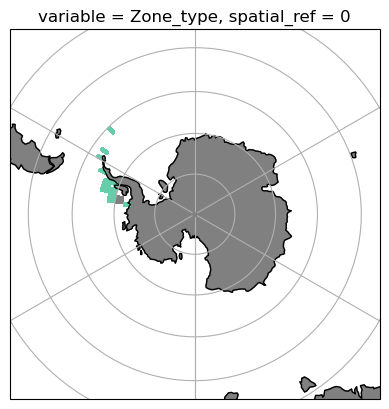

In [130]:
map_proj = ccrs.SouthPolarStereo()

p = D1_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey','cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

# East Antarctic MPA

In [105]:
EA_MPA = gpd.read_file('./data_envir/MPA/EA_MPA.shp')
EA_MPA

,row_id,Name,geometry
0,0,EAMPA-USM,"POLYGON ((136.00000 -65.75000, 136.00000 -63.5..."


In [106]:
# clip MPAs 
EA_krill_carbon = zones_krill_carbon.rio.clip(EA_MPA.geometry.values, EA_MPA.crs, drop=False) # false so it keep the inital shape and fill with Na

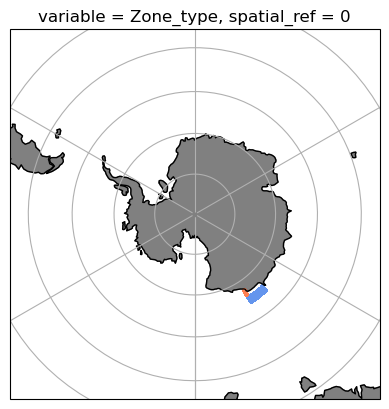

In [107]:
map_proj = ccrs.SouthPolarStereo()

p = EA_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey','cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

### Save proposed MPAs

In [131]:
# arrays of the MPA separatly
Weddell_krill_carbon.to_netcdf('./output_results/Weddell_mpa.nc')
D1_krill_carbon.to_netcdf('./output_results/Ross_mpa.nc')
EA_krill_carbon.to_netcdf('./output_results/SOrkney_mpa.nc')

# Key numbers and areas
- Area of the MPA (given by the CCAMLR or calculated based on the 2°x2° grid)
- Calculate the % of each zone type in the MPAs
- Calculate the protection level (% of each zone type covered by MPAs)

In [178]:
# load area file from OCIM
OCIM = xr.open_dataset('./outputs_formated_data/fseq_OCIM2_48L_interpolated_SO.nc')

# transform area array into a dataframe and crop the file à -45°S
area_df = OCIM[['AREA', 'MASK']].isel(depth=0).to_dataframe().drop(['depth'], axis = 1).reset_index()
area_df = area_df[area_df['latitude'] <=-45].set_index(['latitude', 'longitude'])

## calculate the area of the ocean (remove land) => multiply be the proportion of the ocean in cell (= MASK : 1=ocean, 0=land, or %o each)
area_df['True_area'] = area_df['AREA']*area_df['MASK']
area_df # 3240  rows

AREA      MASK     True_area
latitude longitude                                      
-79      -179.0     9.332850e+09  0.061111  5.703408e+08
         -177.0     9.332850e+09  0.061111  5.703408e+08
         -175.0     9.332850e+09  0.061111  5.703408e+08
         -173.0     9.332850e+09  0.061111  5.703408e+08
         -171.0     9.332850e+09  0.061111  5.703408e+08
...                          ...       ...           ...
-45       171.0     3.458337e+10  0.750000  2.593752e+10
          173.0     3.458337e+10  1.000000  3.458337e+10
          175.0     3.458337e+10  1.000000  3.458337e+10
          177.0     3.458337e+10  1.000000  3.458337e+10
          179.0     3.458337e+10  1.000000  3.458337e+10

[3240 rows x 3 columns]

### Convert the xarrays into df

In [251]:
SOrkney_krill_carbon_df = SOrkney_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'Zone_type'})
SOrkney_krill_carbon_df = SOrkney_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
SOrkney_krill_carbon_df['MPA_name'] = 'SOrkney_protected'
# SOrkney_krill_carbon_df

Ross_krill_carbon_df = Ross_krill_carbon.to_dataframe(name="Zone_type").reset_index().drop(['variable'], axis =1)
Ross_krill_carbon_df = Ross_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
Ross_krill_carbon_df['MPA_name'] = 'Ross_protected'
# Ross_krill_carbon_df

Weddell_krill_carbon_df = Weddell_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'Zone_type'})
Weddell_krill_carbon_df = Weddell_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
Weddell_krill_carbon_df['MPA_name'] = 'Weddell_protected'
# Weddell_krill_carbon_df

D1_krill_carbon_df = D1_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'Zone_type'})
D1_krill_carbon_df = D1_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
D1_krill_carbon_df['MPA_name'] = 'D1_protected'
# D1_krill_carbon_df

EA_krill_carbon_df = EA_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'Zone_type'})
EA_krill_carbon_df = EA_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
EA_krill_carbon_df['MPA_name'] = 'EA_protected'
# EA_krill_carbon_df

In [252]:
mpas_carbon_df = pd.concat([Ross_krill_carbon_df, SOrkney_krill_carbon_df, Weddell_krill_carbon_df, D1_krill_carbon_df, EA_krill_carbon_df])
mpas_carbon_df = mpas_carbon_df.join(other = area_df, how = 'left')
mpas_carbon_df # 173 

Zone_type        MPA_name          AREA  MASK  \
latitude longitude                                                  
-75.0    -179.0           1.0  Ross_protected  1.265922e+10   1.0   
         -177.0           1.0  Ross_protected  1.265922e+10   1.0   
         -175.0           1.0  Ross_protected  1.265922e+10   1.0   
         -173.0           1.0  Ross_protected  1.265922e+10   1.0   
         -171.0           3.0  Ross_protected  1.265922e+10   1.0   
...                       ...             ...           ...   ...   
-65.0     141.0           1.0    EA_protected  2.067035e+10   1.0   
          143.0           1.0    EA_protected  2.067035e+10   1.0   
          145.0           1.0    EA_protected  2.067035e+10   1.0   
          147.0           1.0    EA_protected  2.067035e+10   1.0   
-67.0     147.0           3.0    EA_protected  1.911083e+10   1.0   

                       True_area  
latitude longitude                
-75.0    -179.0     1.265922e+10  
         -177.0     1.265922e+10  
         -175.0     1.265922e+10  
         -173.0     1.265922e+10  
         -171.0     1.265922e+10  
...                          ...  
-65.0     141.0     2.067035e+10  
          143.0     2.067035e+10  
          145.0     2.067035e+10  
          147.0     2.067035e+10  
-67.0     147.0     1.911083e+10  

[173 rows x 5 columns]

In [253]:
# area of the different MPAs based on the 2°x2° grid in m²
mpas_carbon_df.groupby(['MPA_name'])[['True_area']].sum()

,True_area
MPA_name,
D1_protected,3.312920e+11
EA_protected,1.431329e+11
Ross_protected,9.418621e+11
SOrkney_protected,8.881868e+10
Weddell_protected,1.372016e+12


### Add the area of cells to the df

In [254]:
SOrkney_krill_carbon_df = SOrkney_krill_carbon_df.join(other = area_df, how = 'left')
Ross_krill_carbon_df = Ross_krill_carbon_df.join(other = area_df, how = 'left')
Weddell_krill_carbon_df = Weddell_krill_carbon_df.join(other = area_df, how = 'left')
D1_krill_carbon_df = D1_krill_carbon_df.join(other = area_df, how = 'left')
EA_krill_carbon_df = EA_krill_carbon_df.join(other = area_df, how = 'left')

In [255]:
SOrkney_krill_carbon_grouped = SOrkney_krill_carbon_df.groupby(['Zone_type'])[['True_area']].sum()
Ross_krill_carbon_grouped = Ross_krill_carbon_df.groupby(['Zone_type'])[['True_area']].sum()
Weddell_krill_carbon_grouped = Weddell_krill_carbon_df.groupby(['Zone_type'])[['True_area']].sum()
D1_krill_carbon_grouped = D1_krill_carbon_df.groupby(['Zone_type'])[['True_area']].sum()
EA_krill_carbon_grouped = EA_krill_carbon_df.groupby(['Zone_type'])[['True_area']].sum()

In [256]:
SOrkney_krill_carbon_grouped['Prop_area'] = SOrkney_krill_carbon_grouped['True_area'] / SOrkney_krill_carbon_df['True_area'].sum()
Ross_krill_carbon_grouped['Prop_area'] = Ross_krill_carbon_grouped['True_area'] / Ross_krill_carbon_df['True_area'].sum()
Weddell_krill_carbon_grouped['Prop_area'] = Weddell_krill_carbon_grouped['True_area'] / Weddell_krill_carbon_df['True_area'].sum()
D1_krill_carbon_grouped['Prop_area'] = D1_krill_carbon_grouped['True_area'] / D1_krill_carbon_df['True_area'].sum()
EA_krill_carbon_grouped['Prop_area'] = EA_krill_carbon_grouped['True_area'] / EA_krill_carbon_df['True_area'].sum()

In [257]:
# areas in m²
display(SOrkney_krill_carbon_grouped)
display(Ross_krill_carbon_grouped)
display(Weddell_krill_carbon_grouped)
display(D1_krill_carbon_grouped)
display(EA_krill_carbon_grouped)

,True_area,Prop_area
Zone_type,,
1.0,4.440934e+10,0.5
3.0,4.440934e+10,0.5


,True_area,Prop_area
Zone_type,,
0.0,9.830473e+10,0.104373
1.0,5.867480e+11,0.622966
2.0,1.314610e+11,0.139576
3.0,1.253484e+11,0.133086


,True_area,Prop_area
Zone_type,,
0.0,1.271922e+11,0.092705
1.0,5.114586e+11,0.372779
2.0,1.032946e+11,0.075287
3.0,6.300705e+11,0.459230


,True_area,Prop_area
Zone_type,,
0.0,4.777153e+10,0.144198
2.0,2.835205e+11,0.855802


,True_area,Prop_area
Zone_type,,
1.0,1.240221e+11,0.866482
3.0,1.911083e+10,0.133518


### % of each zone type in each MPA

In [258]:
zones_df = pd.read_csv('./output_results/zones_krill_carbon.csv').set_index(['latitude', 'longitude'])[['Zone_type']].dropna()
zones_df = zones_df.join(other = area_df[['True_area']], how = 'left')
zones_df = zones_df.join(other = mpas_carbon_df[['MPA_name']], how='left')
zones_df['MPA_name'] = zones_df['MPA_name'].fillna('unprotected')
zones_df

Zone_type     True_area        MPA_name
latitude longitude                                         
-75      -179             1.0  1.265922e+10  Ross_protected
         -177             1.0  1.265922e+10  Ross_protected
         -175             1.0  1.265922e+10  Ross_protected
         -173             1.0  1.265922e+10  Ross_protected
         -171             3.0  1.265922e+10  Ross_protected
...                       ...           ...             ...
-47       67              0.0  3.335547e+10     unprotected
          69              0.0  3.335547e+10     unprotected
          71              0.0  3.335547e+10     unprotected
          73              0.0  3.335547e+10     unprotected
          75              0.0  3.335547e+10     unprotected

[1771 rows x 3 columns]

In [259]:
# tot area of each zone type :
area_zones = zones_df.groupby('Zone_type')[['True_area']].sum().rename(columns ={'True_area': 'Area_zones'})
area_zones

,Area_zones
Zone_type,
0.0,2.279046e+13
1.0,1.090908e+13
2.0,2.321943e+12
3.0,5.776487e+12


In [260]:
area_mpas = zones_df.groupby('MPA_name')[['True_area']].sum().rename(columns ={'True_area': 'Area_MPA'})
area_mpas

,Area_MPA
MPA_name,
D1_protected,3.312920e+11
EA_protected,1.431329e+11
Ross_protected,9.418621e+11
SOrkney_protected,8.881868e+10
Weddell_protected,1.372016e+12
unprotected,3.892085e+13


In [264]:
zones_df['Protection_status'] = [
    'established_MPA' if x in ['Ross_protected', 'SOrkney_protected']
    else 'unprotected' if x == 'unprotected'
    else 'proposed_MPA'
    for x in zones_df['MPA_name']
]
zones_df

Zone_type     True_area        MPA_name Protection_status
latitude longitude                                                           
-75      -179             1.0  1.265922e+10  Ross_protected   established_MPA
         -177             1.0  1.265922e+10  Ross_protected   established_MPA
         -175             1.0  1.265922e+10  Ross_protected   established_MPA
         -173             1.0  1.265922e+10  Ross_protected   established_MPA
         -171             3.0  1.265922e+10  Ross_protected   established_MPA
...                       ...           ...             ...               ...
-47       67              0.0  3.335547e+10     unprotected       unprotected
          69              0.0  3.335547e+10     unprotected       unprotected
          71              0.0  3.335547e+10     unprotected       unprotected
          73              0.0  3.335547e+10     unprotected       unprotected
          75              0.0  3.335547e+10     unprotected       unprotected

[1771 rows x 4 columns]

In [274]:
area_mpa_zones = zones_df.groupby(['Zone_type', 'MPA_name'])[['True_area']].sum().rename(columns={'True_area':'Area_in_mpa'})
area_mpa_zones = area_mpa_zones.join(other = area_zones, how = 'left')
area_mpa_zones['Prop_zone_mpa'] = 100 * area_mpa_zones['Area_in_mpa'] /area_mpa_zones['Area_zones']
area_mpa_zones

Area_in_mpa    Area_zones  Prop_zone_mpa
Zone_type MPA_name                                                    
0.0       D1_protected       4.777153e+10  2.279046e+13       0.209612
          Ross_protected     9.830473e+10  2.279046e+13       0.431342
          Weddell_protected  1.271922e+11  2.279046e+13       0.558094
          unprotected        2.251719e+13  2.279046e+13      98.800953
1.0       EA_protected       1.240221e+11  1.090908e+13       1.136871
          Ross_protected     5.867480e+11  1.090908e+13       5.378529
          SOrkney_protected  4.440934e+10  1.090908e+13       0.407086
          Weddell_protected  5.114586e+11  1.090908e+13       4.688376
          unprotected        9.642440e+12  1.090908e+13      88.389138
2.0       D1_protected       2.835205e+11  2.321943e+12      12.210484
          Ross_protected     1.314610e+11  2.321943e+12       5.661679
          Weddell_protected  1.032946e+11  2.321943e+12       4.448629
          unprotected        1.803667e+12  2.321943e+12      77.679208
3.0       EA_protected       1.911083e+10  5.776487e+12       0.330838
          Ross_protected     1.253484e+11  5.776487e+12       2.169977
          SOrkney_protected  4.440934e+10  5.776487e+12       0.768795
          Weddell_protected  6.300705e+11  5.776487e+12      10.907504
          unprotected        4.957548e+12  5.776487e+12      85.822886

In [271]:
area_protec_zones = zones_df.groupby(['Zone_type', 'Protection_status'])[['True_area']].sum().rename(columns={'True_area':'Area_protec'})
area_protec_zones = area_protec_zones.join(other = area_zones, how = 'left')
area_protec_zones['Prop_zone_protec'] = 100 * area_protec_zones['Area_protec'] /area_protec_zones['Area_zones']
area_protec_zones

Area_protec    Area_zones  Prop_zone_protec
Zone_type Protection_status                                              
0.0       established_MPA    9.830473e+10  2.279046e+13          0.431342
          proposed_MPA       1.749637e+11  2.279046e+13          0.767706
          unprotected        2.251719e+13  2.279046e+13         98.800953
1.0       established_MPA    6.311573e+11  1.090908e+13          5.785616
          proposed_MPA       6.354807e+11  1.090908e+13          5.825247
          unprotected        9.642440e+12  1.090908e+13         88.389138
2.0       established_MPA    1.314610e+11  2.321943e+12          5.661679
          proposed_MPA       3.868151e+11  2.321943e+12         16.659113
          unprotected        1.803667e+12  2.321943e+12         77.679208
3.0       established_MPA    1.697578e+11  5.776487e+12          2.938772
          proposed_MPA       6.491813e+11  5.776487e+12         11.238342
          unprotected        4.957548e+12  5.776487e+12         85.822886